In [1]:
# Go to general directory

import os
os.chdir('..')

# Workeable libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from functions.table_export import export_to_latex, export_to_word

## <center>**PAPERS CLASSIFICATION METHODOLOGY**</center>

Given the similarity between the papers text, and the isic4 codes descriptions, I generated a similarity matrix between the papers and the product code using the SpaCy library. This notebook is made to define a cutoff to classify with 1 or 0 the each paper.


### **THE SIMILARITY MATRIX**

 The similarity matrix contains the isic4 product code in per column, and the paper code per row index. The current matrix contains 415 columns, and 8195 rows

In [2]:
similarity = pd.read_csv('treatment_data/similarity.csv', index_col=0)
    
export_to_latex(similarity.reset_index().iloc[[0,25,62,80,100], [0,25,62,80,100]], 'similarity_example.tex')
export_to_word(similarity.reset_index().iloc[[0,25,62,80,100], [0,25,62,80,100]], 'similarity_example.docx')

similarity.reset_index().iloc[[0, 25, 62, 80, 100], [0, 25, 62, 80, 100]]

c:\Users\Marcello\Documents\Cotidianidad\Repositrios Git\undergradute-thesis\application\functions\table_export.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df.to_latex(index=False))


,ID,A0150,C1074,C1420,C2021
0,ECOTEC0,0.317848,0.548013,0.446434,0.549180
25,ECOTEC25,0.320490,0.610176,0.641187,0.616872
62,EPN23,0.387861,0.613222,0.596166,0.638505
80,EPN41,0.507463,0.829084,0.650273,0.792887
100,EPN61,0.425886,0.675037,0.567544,0.686002


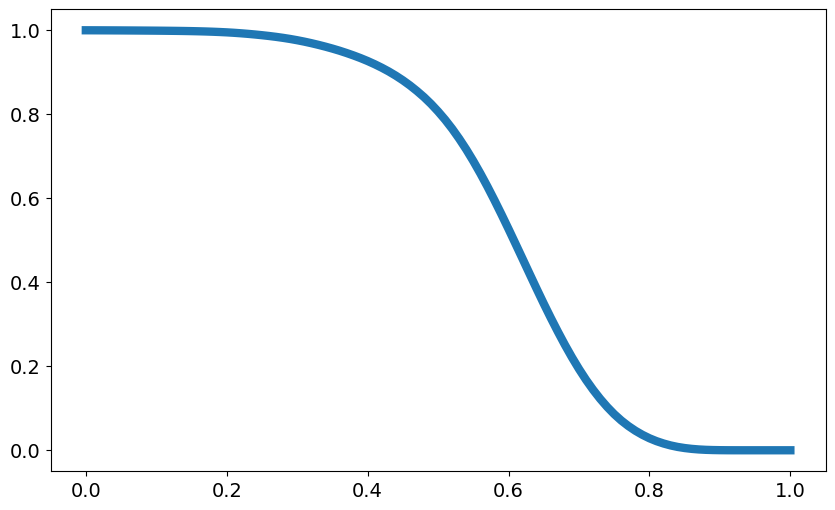

In [7]:
# This code shows the cutoff by all the 
range_base = np.arange(0, 1.01, 0.01)

# Count of observations bigger or equal to the cutoff
count_array = np.zeros(range_base.shape[0])

similarity_matrix = similarity.iloc[:,1:].to_numpy()
for i in range(range_base.shape[0]):
    count_array[i] = (np.where(similarity_matrix>=range_base[i], 1, 0)).sum()
    
# Get the possible values. Also, get free space after redefine similarity_matrix

plt.plot(
    range_base, (count_array / (similarity_matrix.shape[0] * similarity_matrix.shape[1])),
    linewidth=6
)
plt.rcParams['font.size'] = 18
plt.savefig('outputs/graphs/g1_portion_classified.jpg', dpi=600)

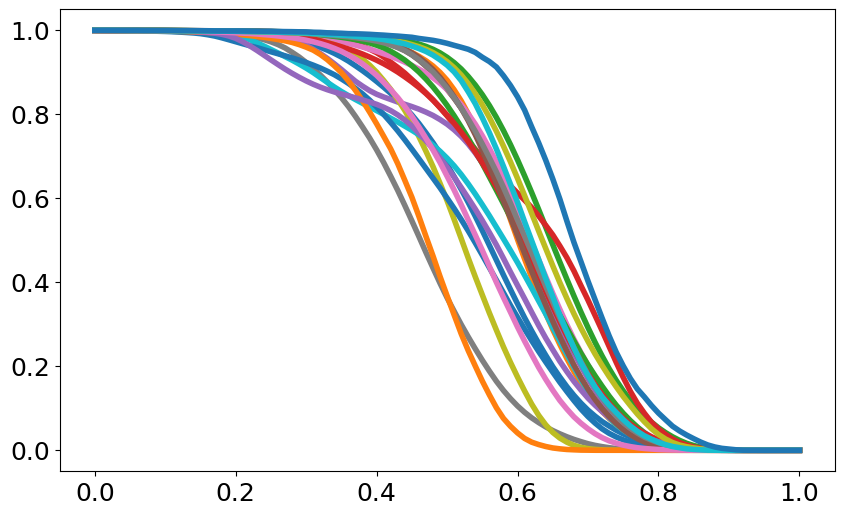

In [8]:
range_base = np.arange(0, 1.01, 0.01)

# We first generate the letter codes

codes_columns = similarity.columns[1:].to_list()

products_codes = [x[0] for x in codes_columns]

products_codes = np.unique(products_codes)

###################################################
### This commented code is to plot by ISIC4 type
##########################################

#######################################################################
for j in products_codes:

    columns_list = [i for i in codes_columns if j in i]
    col_array = similarity[columns_list].to_numpy()

    count_array = np.zeros(range_base.shape[0])

    for i in range(range_base.shape[0]):
        count_array[i] = (np.where(col_array>=range_base[i], 1, 0)).sum()

    col_array = col_array.shape[0] * col_array.shape[1]

    plt.plot(range_base, (count_array / col_array), linewidth=4)
####################################################################
plt.rcParams['font.size'] = 18
plt.savefig('outputs/graphs/g1_2_portion_classified_per_code.jpg', dpi=600)


The graph 1.2 shows that there is an important difference in the portion of papers classified per cutoff. This make relevant to have a different cutoff depending on the code letter

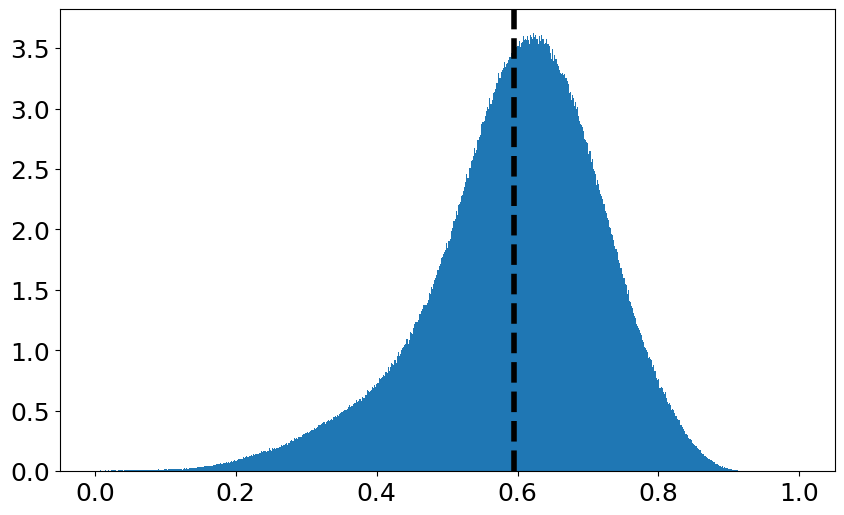

In [9]:
# This code is to show the distribution of the similarity values:

plt.hist(similarity_matrix.flatten(), bins = np.arange(0, 1.001, 0.001), density=True)
plt.axvline(similarity_matrix.flatten().mean(), color='k', linestyle='dashed', linewidth=4)
plt.axvline(similarity_matrix.flatten().mean()+similarity_matrix.flatten().std(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(similarity_matrix.flatten().mean()-similarity_matrix.flatten().std(), color='k', linestyle='dashed', linewidth=3)
plt.rcParams['font.size'] = 18
plt.savefig('outputs/graphs/g1_3_similarity_frequency.jpg')

### THE GENERAL CUTOFF

Seen the data showed, to select a general cutoff of 0.8 shows as a good initial point to classify the papers. The next code shows the products for what each papers is classified:

In [11]:
papers_list = [None]*len(similarity)

code_list = similarity.columns.to_numpy()

classification_list = list(
    map(
        lambda X, Y: ('-').join(
            [x for y in Y for x in X if y >= 0.75]
        ), [code_list]*len(similarity), similarity_matrix
    )
)
    
papers = pd.DataFrame({'ID':similarity.index.to_list(), 'product':classification_list})
papers

,ID,product
0,ECOTEC0,
1,ECOTEC1,
2,ECOTEC2,
3,ECOTEC3,
4,ECOTEC4,
...,...,...
15358,YACHAY243,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15359,YACHAY244,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15360,YACHAY245,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
15361,YACHAY246,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...


Now, we import the information of the papers to append then to the hole data frame

In [12]:
complete = pd.read_csv('treatment_data/complete.csv')

preview_list = [i for i in range(5)]

show_rows, show_cols = [np.random.randint(0,8000) for i in range(50)],[np.random.randint(0,400) for i in range(50)]
    
export_to_latex(complete.iloc[preview_list, preview_list], 'papers_data.tex')
export_to_word(complete.iloc[preview_list, preview_list], 'papers_data.docx')

display(complete.iloc[preview_list, :])

complete = complete.iloc[show_rows, :]

c:\Users\Marcello\Documents\Cotidianidad\Repositrios Git\undergradute-thesis\application\functions\table_export.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df.to_latex(index=False))


,ID,Year,Province,City,Authors,Text
0,ECOTEC0,2018,GUAYAS,GUAYAQUIL,"Aguilar G.F.C., Peña A.B., Ortiz F.G.P., Lara ...",Revenue assurance method using risk analysis a...
1,ECOTEC1,2018,GUAYAS,GUAYAQUIL,"Espinoza Mina M.A., Gallegos Barzola D.P.",Ethical dimension in the use of computer infra...
2,ECOTEC2,2018,GUAYAS,GUAYAQUIL,"Zamora-Boza C., Arrobo-Cedeño N., Cornejo-Marc...",E-government in Ecuador: Innovation in public ...
3,ECOTEC3,2018,GUAYAS,GUAYAQUIL,"Martillo W.A., Ramírez M.O.",Model for the selection of an ERP system in th...
4,ECOTEC4,2018,GUAYAS,GUAYAQUIL,"Vascones Gavica B.C., Villena Izurieta N.P.",The construction industry: Its participation i...


In [13]:
# Now, I add the province of the paper, and the province of the paper, and the city

papers1 = papers
# Be sure taht you have the IDs columns as str
complete['ID'] = complete['ID'].astype(str)
papers1['ID'] = papers1['ID'].astype(str)

# merge on the left
papers1 = complete.merge(papers1, how='left', on='ID')

# Save as latex to the paper

display(papers1.head())

,ID,Year,Province,City,Authors,Text,product
0,INIAP84,2007,PICHINCHA,QUITO,"McElhinny E., Peralta E., Mazón N., Danial D.L...",Aspects of participatory plant breeding for qu...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
1,UCUENCA361,2016,AZUAY,CUENCA,"Barros C.L., Olm J.M., Costa-Castello R.",Rejection of periodic disturbances using MRAC ...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
2,ESPE729,2016,PICHINCHA,SANGOLQUÍ,"Aguiar S., Erazo A., Romero S., Garces E., Ati...",Development of a smart glove as a communicatio...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...
3,PUCE52,2018,PICHINCHA,QUITO,"Djukic I., Kepfer-Rojas S., Schmidt I.K., Lars...",Early stage litter decomposition across biomes...,
4,UCUENCA731,2009,AZUAY,CUENCA,"Buytaert W., Célleri R., Timbe L.",Predicting climate change impacts on water res...,A0111-A0112-A0113-A0114-A0115-A0116-A0119-A012...


The next step takes a between one or two hours. The idea is to first, get the data of the other papers that are not the same, but contains st least one common author.

In [14]:
papers2 = papers1.copy()

papers2.pop('Text')

papers2_matrix = papers2.to_numpy()


publication_matrix = np.array([np.concatenate((x, y)) for x in papers2_matrix for y in papers2_matrix])



# Now, we need to know how connected are the publications with the others. That can be made with the authors and references columns
# The idea is to set a connection as a paper that contains the authors from another in their references

# The output dataframe must have the following columns

# - id: name identifier of the publication
# - year: year of the publication
# - province: 
# - city
# - product: list of products isic4. In the next cells, it will be multiple observations thank of multiple isic4 products per paper

publications = pd.DataFrame(publication_matrix)
publications.columns = ['iid', 'iyear', 'iprovince', 'icity', 'iauthor', 'iproduct', 'oid', 'oyear', 'oprovince', 'ocity', 'oauthor', 'oproduct']
publications = publications.loc[publications['iid']!=publications['oid']]

# First explode by author. This will make easier to select the papers with the same authors

publications['iauthor'] = publications['iauthor'].str.split(', ')
publications['oauthor'] = publications['oauthor'].str.split(', ')
publications = publications.explode(['iauthor'])
publications = publications.explode(['oauthor'])

publications = publications.loc[publications['iauthor']==publications['oauthor']]

# Now, we explode by products, and remove those observations without products

publications['iproduct'] = publications['iproduct'].str.split('-')
publications['oproduct'] = publications['oproduct'].str.split('-')
publications = publications.explode(['iproduct'])
publications = publications.explode(['oproduct'])
publications = publications.loc[publications['iproduct']!='']
publications = publications.loc[publications['oproduct']!='']

# It must be the first paper. Probably publication have repeated observations but flipping i with o

publications = publications.loc[publications['iyear']<publications['oyear']]

# Pop non required columns:

publications.pop('iauthor')
publications.pop('oauthor')

publications.to_csv('treatment_data/publications.csv')
display(publications)
publications = publications.iloc[[np.random.randint(0,len(publications)) for i in range(5)],:]

export_to_latex(publications, 'publications.tex')
export_to_word(publications, 'publications.docx')